In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Import the data. 
data = pd.read_csv(r"C:\Users\wyman\Downloads\datasets_17899_23447_Position_Salaries.csv")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

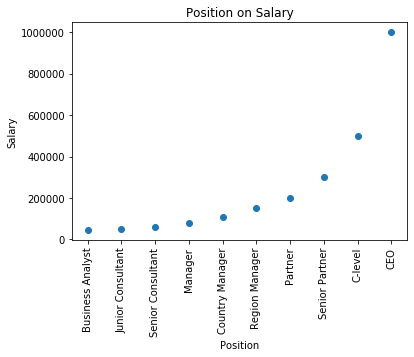

In [4]:
#Visualize the data to get an idea of what model to use.
plt.scatter(data['Position'], data['Salary'])
plt.title('Position on Salary')
plt.xlabel("Position")
plt.ylabel("Salary")
plt.xticks(rotation=90)

We see that the model follows a polynomial regression format.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
X = data['Level'].values.reshape(-1,1)
y = data['Salary']

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [52]:
#Filter what degree polynomial takes. 
poly_features = PolynomialFeatures(degree=5)

In [53]:
#Transform X data.
X_poly = poly_features.fit_transform(X)

Text(0, 0.5, 'Salary')

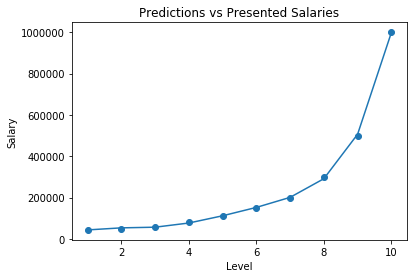

In [55]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(X_poly,y)
predictions = poly_reg.predict(X_poly)
plt.scatter(X,y)
plt.plot(X, predictions)
plt.title("Predictions vs Presented Salaries")
plt.xlabel("Level")
plt.ylabel("Salary")

In [59]:
poly_reg.predict(poly_features.fit_transform(X_test))

array([201349.65034936,  43895.1048956 ])

In [60]:
X_test

array([[7],
       [1]], dtype=int64)

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
lin_reg.predict(X_test)

array([ 390764.33121019, -193312.10191083])

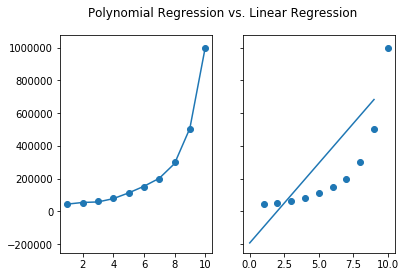

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = "row")
fig.suptitle("Polynomial Regression vs. Linear Regression")
ax1.scatter(X,y)
ax1.plot(X, predictions)
ax2.scatter(X,y)
ax2.plot(lin_reg.predict(X))

We can conclude that the polynomial regression is a much better fit for the data. If we look at the linear regression model, at a level of 1 we get a negative salary which clearly makes no sense at all. The polynomial regression of degree 5 seems to neither underfit nor overfit the data and looks to be a good approximation.